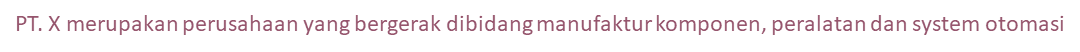
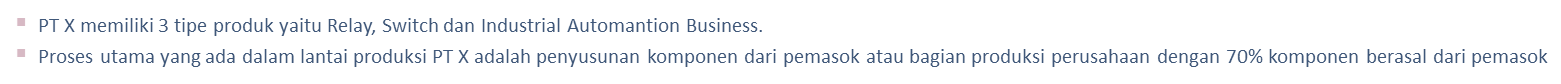

In [78]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt

In [79]:
#Input Data
input_data = pd.read_excel("Data_SRM.xlsx")
input_data.head()

,Supplier Name,Month,Lot Inspected,NRS A,NRS B,NRS C,QCI A,QCI B,QCI C,SAR,Demerit
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,2019-04-01,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,B,2019-04-01,409.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,C,2019-04-01,2066.0,0.0,2.0,3.0,1.0,11.0,1.0,0.0,0.0
4,D,2019-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **DATA PREPROCESSING**

In [80]:
#Filter kolom dan baris yang digunakan
x = input_data.drop(['Supplier Name','Month'], axis = 1)
x = x.drop(0, axis = 0)
x.head()

,Lot Inspected,NRS A,NRS B,NRS C,QCI A,QCI B,QCI C,SAR,Demerit
1,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,409.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2066.0,0.0,2.0,3.0,1.0,11.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,347.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [81]:
#Melihat apakan ada data NaN/missing value
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 1 to 682
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Lot Inspected  682 non-null    float64
 1   NRS A          682 non-null    float64
 2   NRS B          682 non-null    float64
 3   NRS C          682 non-null    float64
 4   QCI A          682 non-null    float64
 5   QCI B          682 non-null    float64
 6   QCI C          682 non-null    float64
 7   SAR            682 non-null    float64
 8   Demerit        682 non-null    float64
dtypes: float64(9)
memory usage: 53.3 KB


In [82]:
#Mengubah Data Frame menjadi array
x_array = np.array(x)
print(x_array)

[[1.400e+01 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [4.090e+02 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.066e+03 0.000e+00 2.000e+00 ... 1.000e+00 0.000e+00 0.000e+00]
 ...
 [2.517e+03 0.000e+00 0.000e+00 ... 1.700e+01 0.000e+00 0.000e+00]
 [1.104e+03 0.000e+00 0.000e+00 ... 4.000e+00 5.700e+01 1.000e-02]
 [3.100e+01 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]]


In [62]:
#Scaling dataset with MinMax (Normalisasi)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
print(x_scaled)

[[0.00406977 0.         0.         ... 0.         0.         0.        ]
 [0.11889535 0.         0.         ... 0.         0.         0.        ]
 [0.6005814  0.         0.4        ... 0.05882353 0.         0.        ]
 ...
 [0.73168605 0.         0.         ... 1.         0.         0.        ]
 [0.32093023 0.         0.         ... 0.23529412 0.14652956 0.33333333]
 [0.00901163 0.         0.         ... 0.         0.         0.        ]]


In [83]:
#Array menjadi Data Frame
MinMax = pd.DataFrame(x_scaled,columns = ['Lot Inspected','NRS A','NRS B','NRS C',
                                          'QCI A', 'QCI B','QCI C','SAR','Demerit'])
MinMax.head()

,Lot Inspected,NRS A,NRS B,NRS C,QCI A,QCI B,QCI C,SAR,Demerit
0,0.004070,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.0,0.0
1,0.118895,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.0,0.0
2,0.600581,0.0,0.4,0.375,0.166667,0.423077,0.058824,0.0,0.0
3,0.000000,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.0,0.0
4,0.100872,0.0,0.0,0.125,0.000000,0.000000,0.000000,0.0,0.0


# **DATA PROCESSING**

Evaluating with the Elbow Method and Silhouette Index to determine the optimal n cluster (k)

In [84]:
#Elbow Method
#(menggunakan SSE, k yang digunakan yaitu nilai sse yang memiliki selisih signifikan dari k sebelumnya dan membentuk elbow)

sse = {}
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(x_scaled)
    sse[k] = kmeans.inertia_

print(sse)

{2: 66.0303590972852, 3: 41.223189701799654, 4: 34.023351969848676, 5: 29.564802481450393, 6: 25.962040881127546, 7: 23.16895104165351, 8: 20.592124291704163, 9: 18.71216413484786, 10: 17.751856174841677}


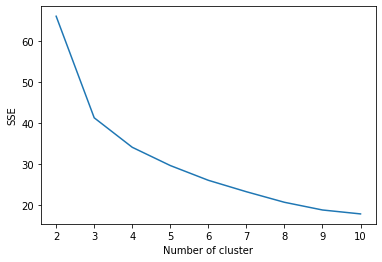

In [85]:
#Plot figure untuk melihat dengan jelas perbedaan signifikan sse dari setiap k
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

[0.7529024625347353, 0.7826927621532846, 0.7887233888440417, 0.7487613833208268, 0.766299795525459, 0.7684648978382761, 0.765777339809261, 0.6764226149113013, 0.6816322844502319]


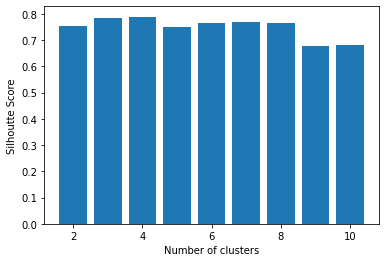

In [86]:
#Silhoutte Index (Semakin mendekati nilai 1, silhouette index semakin baik)

silhouette_scores = []

for k in range(2,11):
    silhouette_scores.append(
        silhouette_score(x_scaled, KMeans(n_clusters=k, max_iter=1000).fit_predict(x_scaled)))
k=[2,3,4,5,6,7,8,9,10]
print(silhouette_scores)
plt.bar(k,silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Silhoutte Score', fontsize = 10)
plt.show()

# **K-MEANS CLUSTERING**
From the two evaluations above, it can be seen that the optimal number of clusters using k-means = 3

K-Means Clustering is a data analysis method or Data Mining method that performs data grouping using a partition system. There are 3 types of data clustering that are often used in the data grouping process, namely Hierarchical, Non-Hierarchical, and Density-based. K-Means is a non-hierarchical data clustering method or can be referred to as Partitional Clustering.

In [87]:
#K-Means Clustering

kmeans = KMeans(n_clusters = 3,init='k-means++',n_init=10,max_iter=1000)
kmeans.fit(x_scaled)
yt_kmeans = kmeans.predict(x_scaled)
centers = kmeans.cluster_centers_
pd.DataFrame(centers, columns = 
                  ['Lot Inspected','NRS A','NRS B','NRS C','QCI A', 
                   'QCI B','QCI C','SAR','Demerit'])

,Lot Inspected,NRS A,NRS B,NRS C,QCI A,QCI B,QCI C,SAR,Demerit
0,0.036134,1.301043e-18,0.015514,0.018971,0.002248,0.006486,0.017062,0.003386,0.002248
1,0.079892,2.857143e-02,0.028571,0.021429,0.004762,0.031868,0.067227,0.005876,0.923810
2,0.518196,4.336809e-19,0.114815,0.171296,0.123457,0.260684,0.253813,0.319480,0.024691


In [68]:
# Menambahkan kolom baru yaitu label kluster pada tabel awal

y = input_data.drop(0, axis = 0)
y["Kluster"]=kmeans.labels_
y.head()

,Supplier Name,Month,Lot Inspected,NRS A,NRS B,NRS C,QCI A,QCI B,QCI C,SAR,Demerit,Kluster
1,A,2019-04-01,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,B,2019-04-01,409.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,C,2019-04-01,2066.0,0.0,2.0,3.0,1.0,11.0,1.0,0.0,0.0,1
4,D,2019-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,E,2019-04-01,347.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


In [88]:
# Export hasil cluster menjadi Excel

y.to_excel("Hasil Kluster.xlsx", index = False)